# IMPORT NECESSARY LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings ('ignore') 

In [2]:
sns.set(style='darkgrid')

# READ CSV FILE

In [3]:
df=pd.read_csv('latest Covid-19 India Status1.csv')

In [4]:
df.head(10)

,State/UTs,Total Cases,Active,Deaths,Active Ratio (%),Death Ratio (%)
0,Maharashtra,6122893,117869,123857,1.93,2.02
1,Kerala,3011694,108400,14108,3.60,0.47
2,Karnataka,2862338,39626,35601,1.38,1.24
3,Tamil Nadu,2506848,34076,33196,1.36,1.32
4,Andhra Pradesh,1911231,32356,12919,1.69,0.68
5,Uttar Pradesh,1706934,1947,22666,0.11,1.33
6,West Bengal,1508223,16655,17850,1.10,1.18
7,Delhi,1434780,858,25005,0.06,1.74
8,Chhattisgarh,996689,5017,13464,0.50,1.35
9,Rajasthan,952887,935,8942,0.10,0.94


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   State/UTs         36 non-null     object 
 1   Total Cases       36 non-null     int64  
 2   Active            36 non-null     int64  
 3   Deaths            36 non-null     int64  
 4   Active Ratio (%)  36 non-null     float64
 5   Death Ratio (%)   36 non-null     float64
dtypes: float64(2), int64(3), object(1)
memory usage: 1.8+ KB


In [6]:
df.describe()

,Total Cases,Active,Deaths,Active Ratio (%),Death Ratio (%)
count,3.600000e+01,36.000000,36.000000,36.000000,36.000000
mean,8.530432e+05,13657.111111,11250.777778,2.586667,1.253889
std,1.223486e+06,27065.893597,21412.276037,3.728932,0.565298
min,7.491000e+03,14.000000,4.000000,0.060000,0.040000
25%,5.951300e+04,1033.250000,782.500000,0.227500,0.930000
50%,4.353345e+05,1966.500000,4550.500000,1.130000,1.315000
75%,9.638375e+05,12767.750000,13055.250000,2.925000,1.657500
max,6.122893e+06,117869.000000,123857.000000,17.440000,2.700000


In [7]:
df.describe(include=object)

,State/UTs
count,36
unique,36
top,Maharashtra
freq,1


In [8]:
df.isnull().sum()

State/UTs           0
Total Cases         0
Active              0
Deaths              0
Active Ratio (%)    0
Death Ratio (%)     0
dtype: int64

# TOTAL CASES IN STATES

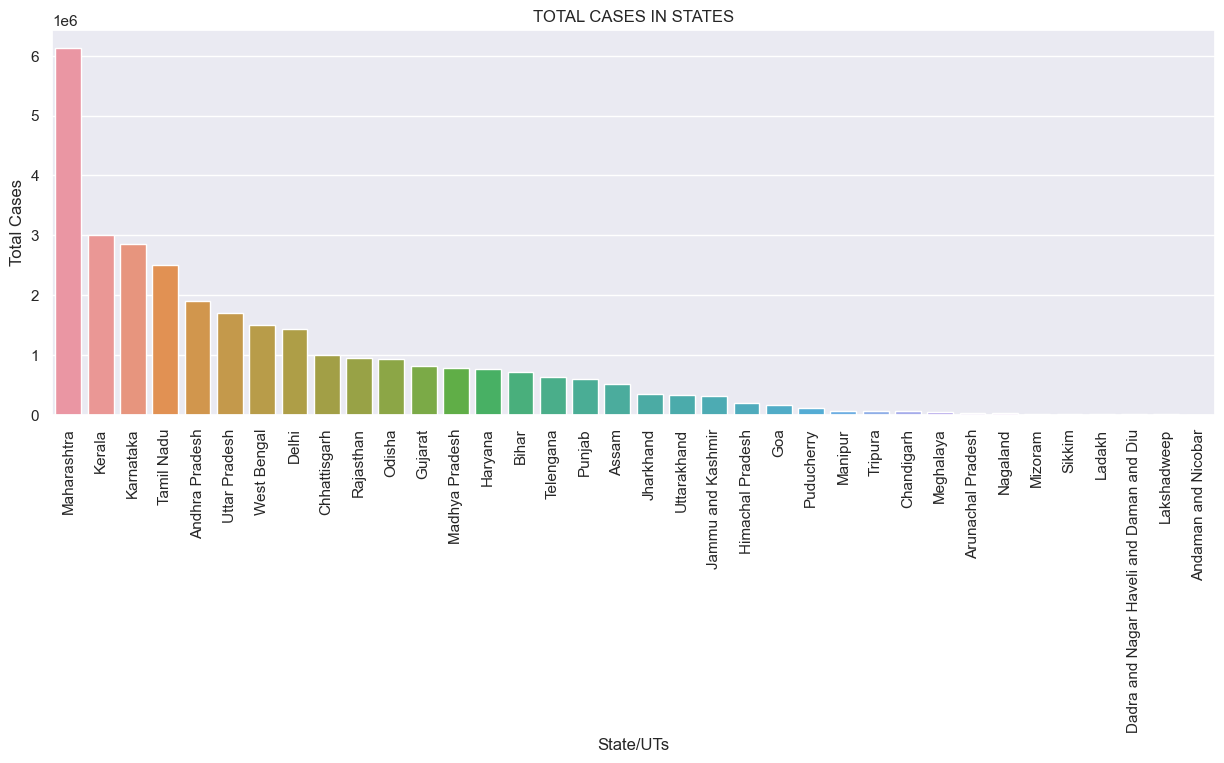

In [9]:
plt.figure(figsize=(15,5))
plt.title('TOTAL CASES IN STATES')
sns.barplot(x="State/UTs",y="Total Cases",data=df)
plt.xticks(rotation=90)
plt.show()

# ACTIVE CASES IN STATES

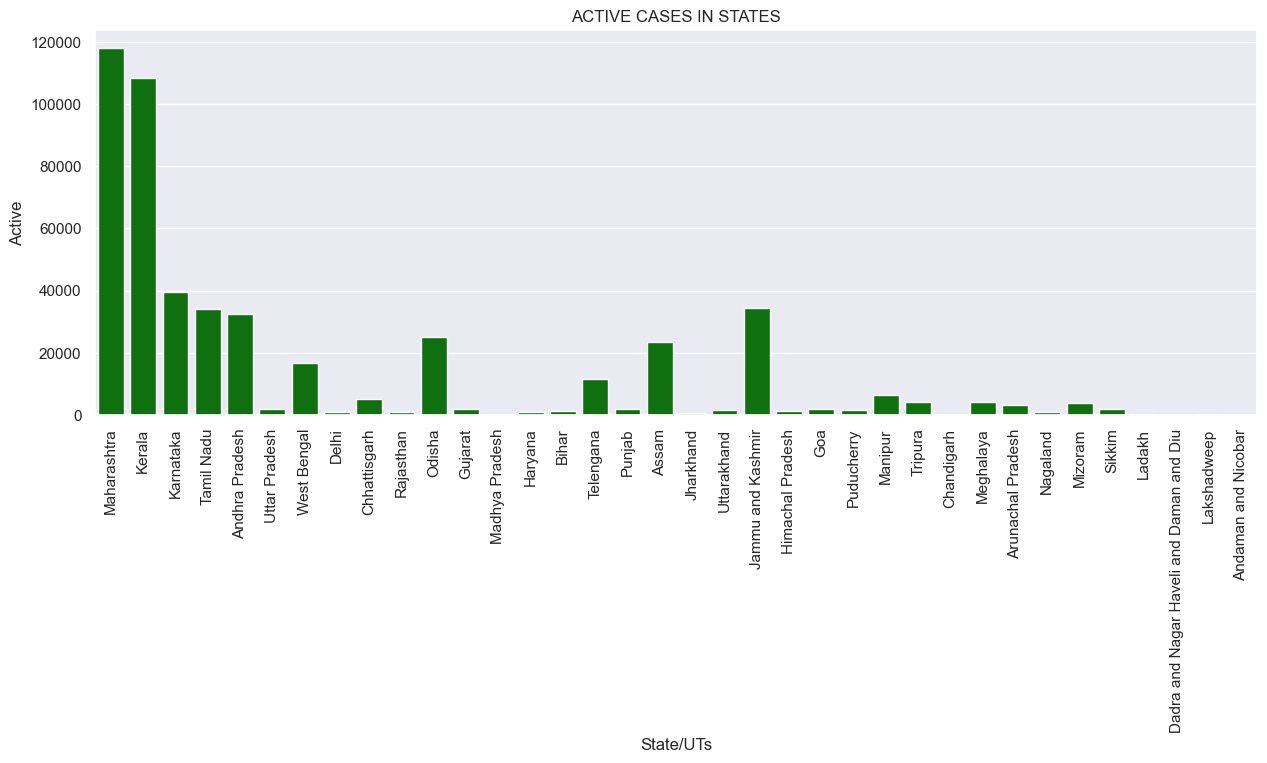

In [10]:
plt.figure(figsize=(15,5))
plt.title('ACTIVE CASES IN STATES')
sns.barplot(x='State/UTs',y='Active',data=df,color='green')
plt.xticks(rotation=90)
plt.show()

#  DEATHS CASES IN STATES

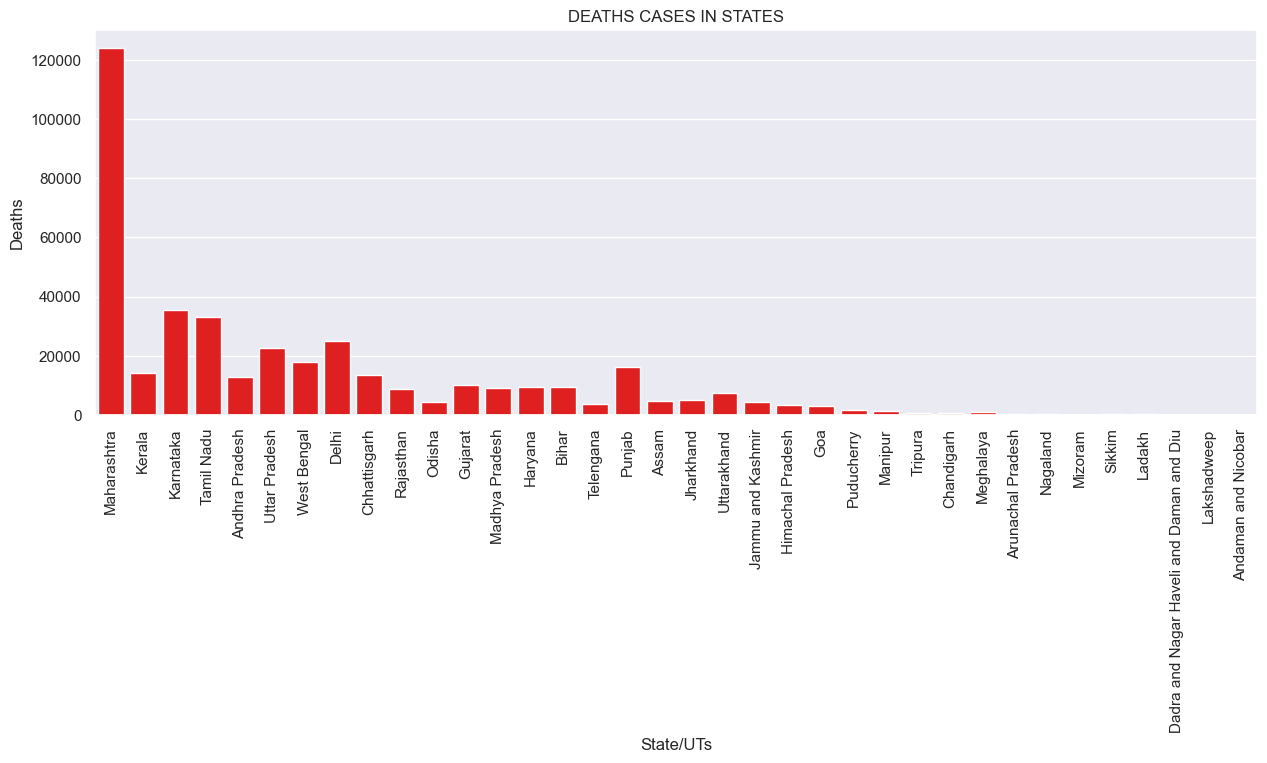

In [11]:
plt.figure(figsize=(15,5))
plt.title('DEATHS CASES IN STATES')
sns.barplot("State/UTs","Deaths",data=df,color="red")
plt.xticks(rotation=90)
plt.show()

# ACTIVE RATIO IN STATES

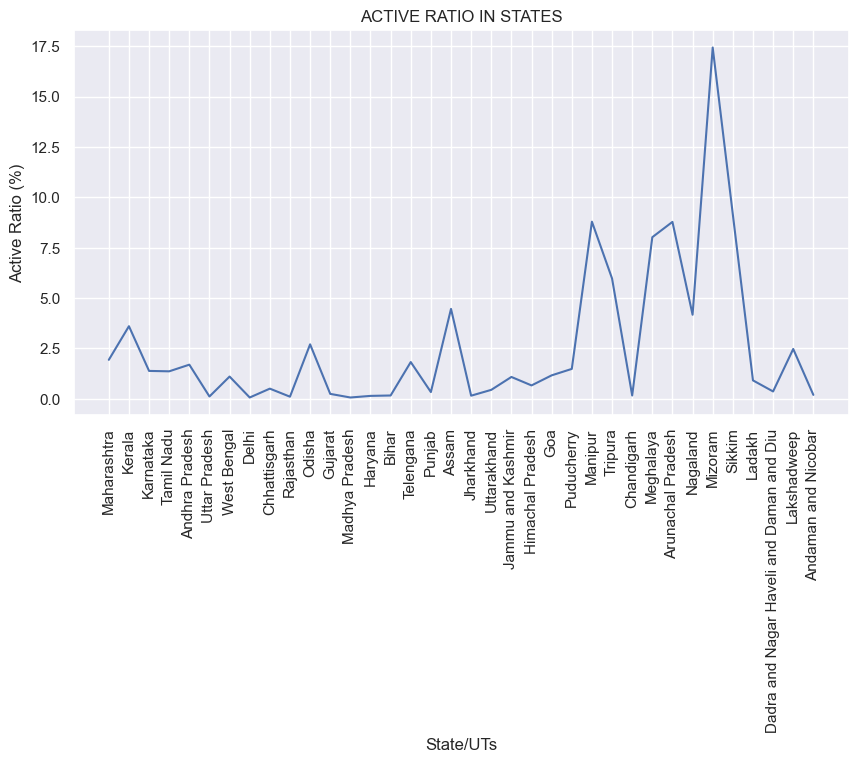

In [12]:
plt.figure(figsize=(10,5))
plt.title('ACTIVE RATIO IN STATES')
sns.lineplot(x='State/UTs',y='Active Ratio (%)',data=df)
plt.xticks(rotation=90)
plt.show()

# TOP 5 ACTIVE CASES STATES IN INDIA

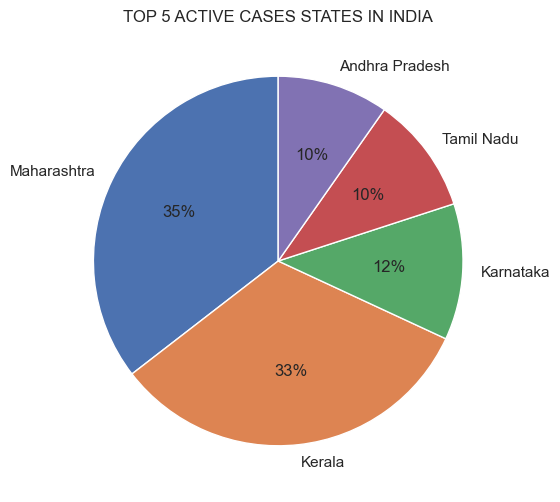

In [13]:
labels = df.index
plt.figure(figsize=(6,6))
plt.title("TOP 5 ACTIVE CASES STATES IN INDIA")
plt.pie(x='Active', data=df.head(), labels='State/UTs',startangle=90,autopct='%.0f%%')
plt.show()

In [14]:
Recovered_Cases=df['Total Cases']-(df['Active'])+df['Deaths']

In [15]:
df['Recovered Cases']=Recovered_Cases

In [16]:
df.head(10)

,State/UTs,Total Cases,Active,Deaths,Active Ratio (%),Death Ratio (%),Recovered Cases
0,Maharashtra,6122893,117869,123857,1.93,2.02,6128881
1,Kerala,3011694,108400,14108,3.60,0.47,2917402
2,Karnataka,2862338,39626,35601,1.38,1.24,2858313
3,Tamil Nadu,2506848,34076,33196,1.36,1.32,2505968
4,Andhra Pradesh,1911231,32356,12919,1.69,0.68,1891794
5,Uttar Pradesh,1706934,1947,22666,0.11,1.33,1727653
6,West Bengal,1508223,16655,17850,1.10,1.18,1509418
7,Delhi,1434780,858,25005,0.06,1.74,1458927
8,Chhattisgarh,996689,5017,13464,0.50,1.35,1005136
9,Rajasthan,952887,935,8942,0.10,0.94,960894


In [17]:
df.groupby('State/UTs')['Recovered Cases'].sum().sort_values(ascending=False).reset_index()

,State/UTs,Recovered Cases
0,Maharashtra,6128881
1,Kerala,2917402
2,Karnataka,2858313
3,Tamil Nadu,2505968
4,Andhra Pradesh,1891794
5,Uttar Pradesh,1727653
6,West Bengal,1509418
7,Delhi,1458927
8,Chhattisgarh,1005136
9,Rajasthan,960894
